# 1INF24 Inteligencia Artificial

## Laboratorio 3 - Parte 1: Pre-procesamiento de datos

## Indicaciones generales:

- Las respuestas deben contar con **fundamento teórico**.
- Cualquier indicio de plagio resultará en la anulación de la prueba.
- Se espera que sus respuestas se justifiquen con ayuda de los resultados de ejecución en los casos que se solicite. **No se calificarán aquellas respuestas que no presenten un resultado de ejecución o que no concuerden con este**.
- Subir el cuadernillo con el nombre **Lab03_código.ipynb**, donde código es su código PUCP de 8 dígitos.
- Está prohibido el uso de herramientas de IA. En caso se detecte el uso de estas herramientas la calificación será 00.
- No está permitido el uso de material de clase.


## Caso:

Este laboratorio se basa en un conjunto de datos de juegos de mesa hasta 2025 obtenido de BoardGameGeek. El dataset a utilizar contiene información detallada sobre miles de juegos de mesa y sus características. Las columnas más relevantes incluyen:

| **Columna**                       | **Descripción**                                                                                      |
|-----------------------------------|------------------------------------------------------------------------------------------------------|
| `name`                            | Nombre del juego de mesa (categórica).                                                               |
| `yearpublished`                   | Año de publicación del juego (numérica).                                                             |
| `minplayers`                      | Número mínimo de jugadores recomendado (numérica).                                                   |
| `maxplayers`                      | Número máximo de jugadores recomendado (numérica).                                                   |
| `playingtime`                     | Tiempo de juego promedio en minutos (numérica).                                                      |
| `minplaytime`                     | Tiempo mínimo de juego en minutos (numérica).                                                        |
| `maxplaytime`                     | Tiempo máximo de juego en minutos (numérica).                                                        |
| `minage`                          | Edad mínima recomendada (numérica).                                                                  |
| `boardgamecategory`               | Categorías del juego (categórica). Ejemplo: 'estrategia', 'familia', 'cartas', etc. Como arreglo de cadenas.       |
| `boardgamemechanic`               | Mecánicas de juego (categórica). Ejemplo: 'gestión de recursos', 'construcción de mazos', etc. Como arreglo de cadenas.       |
| `boardgamedesigner`               | Diseñadores del juego (categórica). Como arreglo de cadenas.                                                                 |
| `boardgamepublisher`              | Editoriales que han publicado el juego (categórica). Como arreglo de cadenas.                                                 |
| `average`                         | Puntuación media asignada por los usuarios (numérica: 1-10).                                         |
| `bayesaverage`                    | Puntuación media bayesiana (ajustada por número de votos) (numérica: 1-10).                          |
| `Board Game Rank`                 | Posición en el ranking general de juegos de mesa (numérica).                                          |
| `usersrated`                      | Número de usuarios que han valorado el juego (numérica).                                             |
| `owned`                           | Número de usuarios que indican poseer el juego (numérica).                                           |
| `averageweight`                   | Complejidad media del juego según los usuarios (numérica: 1-5, donde 5 es más complejo).             |
| `suggested_num_players`           | Número de jugadores sugerido basado en valoraciones de usuarios (array de diccionarios).                        |
| `suggested_playerage`             | Edad de juego sugerida basada en valoraciones de usuarios (array de diccionarios).                              |

<br/>

El objetivo de este laboratorio será aplicar técnicas de preprocesamiento de datos sobre este conjunto para garantizar la calidad y consistencia de los datos antes de su uso en otros modelos.


## Descarga de datos

In [ ]:
# No modificar

# El dataset puede ser descargado mediante esta celda o desde PAIDEIA

import requests

response = requests.get(
    "https://www.kaggle.com/api/v1/datasets/download/jvanelteren/boardgamegeek-reviews/games_detailed_info2025.csv",
    allow_redirects=True,
    stream=True
)
response.raise_for_status()
with open('games_detailed_info2025.csv', 'wb') as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

print("Archivo descargado exitosamente")


Archivo descargado exitosamente


# Parte 1

In [ ]:
# No modificar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Pregunta 1  (1 punto)
Leer correctamente el archivo. Considere utiliza la columna 'id' como índice. Elimine la primera columna sin nombre. Elimine estas columnas que no serán necesarias para este laboratorio:

columns=['thumbnail', 'alternate', 'boardgamefamily', 'boardgameexpansion', 'boardgameartist', 'boardgameimplementation', 'boardgameaccessory', 'boardgamecompilation', 'boardgamepublisher', 'boardgameintegration', 'RPG Item Rank', 'Accessory Rank']

Muestre las dimensiones del DataFrame.

In [ ]:
# Completar
df = pd.read_csv('games_detailed_info2025.csv', index_col=2)
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['thumbnail', 'alternate', 'boardgamefamily', 'boardgameexpansion', 'boardgameartist', 'boardgameimplementation', 'boardgameaccessory', 'boardgamecompilation', 'boardgamepublisher', 'boardgameintegration', 'RPG Item Rank', 'Accessory Rank'])

### Pregunta 2 (2 puntos)
Analice las columnas yearpublished, minplayers, averageweight y average. Por cada una, muestre (con un gráfico de barras, histograma, etc) si hay datos incorrectos de acuerdo a lo descrito en la tabla de arriba. Considere además los siguientes criterios:
- yearpublished: Debe ser un número entero entre 1900 y 2025, inclusive.
- minplayers: Debe ser un número entero entre 1 y 20, inclusive.

Responda en la celda de texto cuáles son las columnas con datos incorrectos y qué datos son incorrectos.

Tip: Puede usar seaborn con sns.histplot() o sns.countplot() para graficar.

Cantidad de años incorrectos (menores a 1900): 370
Tipo de datos de yearpublished: int64


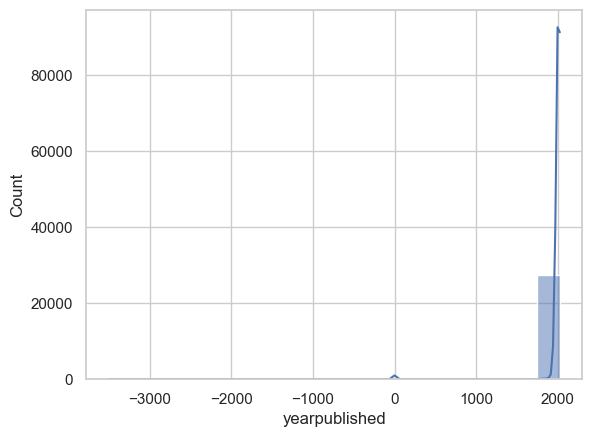

In [ ]:
# Completar
# Histograma de year
sns.histplot(df['yearpublished'], bins=20, kde=True)
print("Cantidad de años incorrectos (menores a 1900):", df[df['yearpublished'] < 1900].shape[0])
print("Tipo de datos de yearpublished:", df['yearpublished'].dtype) #se verifica que todos los años sean enteros

Cantidad de valores 0 en minplayers: 51
Tipo de datos de minplayers: int64


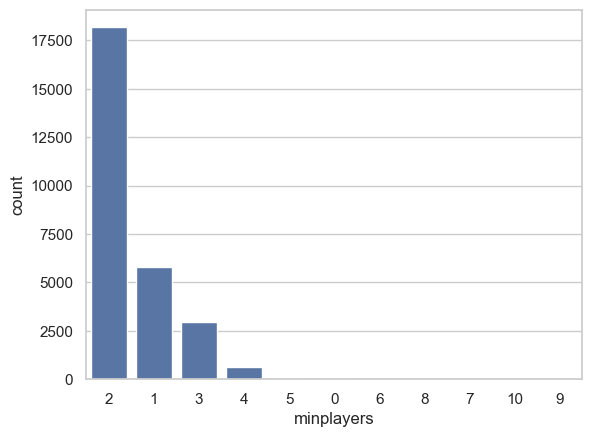

In [ ]:
# Gráfico de barras de minplayers
sns.countplot(data=df, x='minplayers', order=df['minplayers'].value_counts().index)
print("Cantidad de valores 0 en minplayers:", df[df['minplayers'] == 0].shape[0])
print("Tipo de datos de minplayers:", df['minplayers'].dtype) #se verifica que todos los valores sean enteros

Cantidad de valores 0 en averageweight: 494


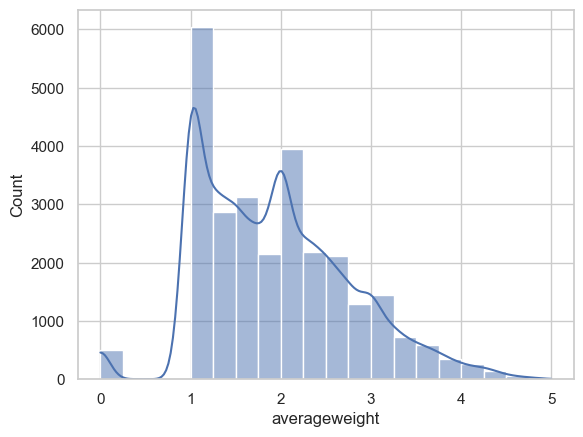

In [ ]:
sns.histplot(df['averageweight'], bins=20, kde=True)
print("Cantidad de valores 0 en averageweight:", df[df['averageweight'] == 0].shape[0])

Cantidad de valores menroes a 1 en average: 0
Cantidad de valores mayores a 10 en average: 0


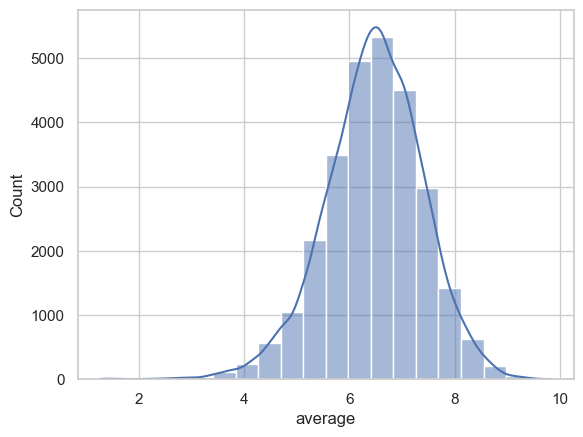

In [ ]:
sns.histplot(df['average'], bins=20, kde=True)
print("Cantidad de valores menroes a 1 en average:", df[df['average'] < 1].shape[0])
print("Cantidad de valores mayores a 10 en average:", df[df['average'] > 10].shape[0])

Responder aquí:
(no hace falta que mencionen la cantidad exacta de filas, pero sí mencionar qué columnas tienen datos incorrectos y por qué son incorrectos.)
- yearpublished: 370 filas tienen yearpublished fuera del rango. Se cumple que todos los valores son enteros.
- minplayers: 51 filas tienen minplayers en 0. Se cumple que todos los valores son enteros.
- averageweight: 494 filas tienen averageweight en 0.
- average: No tiene valores incorrectos así que no debería estar o se debería mencionar que no tiene valores incorrectos.

### Pregunta 3 (3 puntos)
- De acuerdo a lo respondido en la pregunta anterior, elimine las filas que contengan datos incorrectos. Muestre las dimensiones del DataFrame después de la limpieza. ¿Es siempre correcto eliminar filas con datos incorrectos? Justifique su respuesta.

- Además, analice la columna 'median' y 'type'. ¿Qué recomienda hacer con ellas? Realice la acción recomendada.

- La columna 'usersrated' contiene el número de usuarios que han valorado el juego. Para este laboratorio, considere que un juego con menos de 50 valoraciones no es relevante. Elimine los juegos que no cumplan con este criterio. Muestre las dimensiones del DataFrame después de la limpieza.

In [ ]:
# Completar
# Eliminar filas con 0 en minplayers, yearpublished y averageweight
print("Cantidad de filas antes de eliminar:", df.shape[0])
df = df[(df['minplayers'] != 0)]
df = df[(df['yearpublished'] >= 1900)]
df = df[(df['averageweight'] != 0)]
print("Cantidad de filas después de eliminar:", df.shape[0])

# No siempre es lo mejor eliminar filas donde una columna tenga un dato incorrecto. Si para nuestro objetivo final estas columnas son irrelevantes, podemos optar por eliminar la columna completa y conservar la fila, pues pueden tener datos relevantes en otras columnas.

Cantidad de filas antes de eliminar: 27780
Cantidad de filas después de eliminar: 26886


In [ ]:
# Completar
print(df['median'].describe())
print(df['type'].describe())
# Tiene solo un valor constante 0. En ningún caso sería útil, por lo que se elimina la columna. Lo mismo ocurre con la columna 'type' que tiene solo un valor constante 'boardgame'.
df = df.drop(columns=['median', 'type'])

count   26886.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: median, dtype: float64
count         26886
unique            1
top       boardgame
freq          26886
Name: type, dtype: object


In [ ]:
# Completar
print("Cantidad de filas anteriores a eliminar:", df.shape[0])
# Se eliminan las filas con valores menores a 50 en usersrated
df = df[df['usersrated'] >= 50]
print("Cantidad de filas posteriores a eliminar:", df.shape[0])

Cantidad de filas anteriores a eliminar: 26886
Cantidad de filas posteriores a eliminar: 21723


### Pregunta 4 (4 ptos)
Muestre los valores nulos en las columnas que tienen Rank en el nombre. Considerando que estas columnas son indicadores de la posición en el Ranking de determinada categoría (ej. tener 10 en Party Game Rank significa que el juego es el décimo mejor juego de mesa en la categoría Party Game), ¿qué recomienda hacer con estos valores nulos? Realice la acción recomendada y justifique su respuesta.

Complete los valores faltantes de las demás columnas con la media, moda o mediana.

In [ ]:
# Completar
columnasConRank = df.columns[df.columns.str.contains('Rank')].tolist()
df.loc[:, columnasConRank].isnull().sum()

Board Game Rank             0
Strategy Game Rank      18741
Family Game Rank        18446
Abstract Game Rank      20684
Party Game Rank         20840
Thematic Rank           20062
War Game Rank           18431
Customizable Rank       21399
Children's Game Rank    20880
dtype: int64

In [ ]:
# 1) Identificar todas las columnas de tipo “Rank”
rank_cols = [c for c in df.columns if c.endswith('Rank')]

# 2) Para cada columna, imputar NaN → max_val + 1. También se pueden dejar en null (decir que no se hace nada porque no se quiere alterar el orden del ranking) o imputar otro valor que no altere el orden de los rankings.
for col in rank_cols:
    max_rank = df[col].max(skipna=True)
    fill_value = int(max_rank) + 1
    df[col] = df[col].fillna(fill_value)

# 3) Verificación
print("Valores únicos tras imputar (ejemplo en 3 primeras cols):")
for col in rank_cols[:3]:
    print(col, sorted(df[col].unique())[-5:])  # últimos 5 valores, para comprobar el max+1


Valores únicos tras imputar (ejemplo en 3 primeras cols):
Board Game Rank [np.int64(27861), np.int64(27862), np.int64(27863), np.int64(27864), np.int64(27867)]
Strategy Game Rank [np.float64(3031.0), np.float64(3032.0), np.float64(3033.0), np.float64(3034.0), np.float64(3035.0)]
Family Game Rank [np.float64(3364.0), np.float64(3365.0), np.float64(3366.0), np.float64(3367.0), np.float64(3368.0)]


In [ ]:
# Completar
columnasConRank = df.columns[df.columns.str.contains('Rank')].tolist()
df.loc[:, columnasConRank].isnull().sum()

Board Game Rank         0
Strategy Game Rank      0
Family Game Rank        0
Abstract Game Rank      0
Party Game Rank         0
Thematic Rank           0
War Game Rank           0
Customizable Rank       0
Children's Game Rank    0
dtype: int64

Responder aquí:
Para este caso, se recomienda mantener los valores nulos, ya que representan juegos que no pertenecen a una u otra categoría. Si se eliminan, se perdería información sobre la posición de estos juegos en los rankings a los que pertenecen. Imputar los valores nulos con la media o la mediana podría llevar a una interpretación errónea de los datos, ya que estos valores no reflejarían el orden real de los juegos en esas categorías. Otra opción es imputarlos con algún valor que no altere el orden, como un valor superior al del rank máximo en cada columna.

**Nota: Durante la revisión vi que algunos sugirieron eliminarlo por el alto porcentaje de nulls. Sugiero considerarlo como válido también si está bien justificado. La idea de la pregunta es que tomen una decisión y la defiendan**

In [ ]:
# 2) Imputar suggested_playerage y suggested_language_dependence con la moda. Considerar como válido que hayan eliminado los nulos en estas columnas, pues imputar la moda no tiene mucho sentido
mode_age = df['suggested_playerage'].mode().iloc[0]
df['suggested_playerage'] = df['suggested_playerage'].fillna(mode_age)

mode_lang = df['suggested_language_dependence'].mode().iloc[0]
df['suggested_language_dependence'] = df['suggested_language_dependence'].fillna(mode_lang)

mode_img = df['image'].mode().iloc[0]
df['image'] = df['image'].fillna(mode_img)

# 3) Rellenar los multi-valor categóricos con lista vacía
for col in ['boardgamecategory','boardgamemechanic','boardgamedesigner']:
    df[col] = df[col].apply(lambda x: x if isinstance(x, list) else [])

# Verificación rápida
print("Nulls tras imputación:")
print(df[['suggested_playerage','suggested_language_dependence']].isnull().sum())

Nulls tras imputación:
suggested_playerage              0
suggested_language_dependence    0
dtype: int64


### Pregunta 5 (2.5 ptos)
Se le proporciona el esqueleto de la función `diccionario_a_unico_valor` que transforma una columna de un DataFrame que contiene diccionarios en forma de string a un único valor. Complete la función en las partes donde se indique #COMPLETAR. Se busca que la función devuelva el valor más sugerido por los usuarios. Para el caso de suggested_num_players, se debe devolver el número de jugadores marcado como Best más veces.

Ejemplo de funcionamiento:
```python
Ejemplo antes de procesar:
[{'@level': '1', '@value': 'No necessary in-game text', '@numvotes': '21'}, {'@level': '2', '@value': 'Some necessary text - easily memorized or small crib sheet', '@numvotes': '293'}, {'@level': '3', '@value': 'Moderate in-game text - needs crib sheet or paste ups', '@numvotes': '30'}, {'@level': '4', '@value': 'Extensive use of text - massive conversion needed to be playable', '@numvotes': '1'}, {'@level': '5', '@value': 'Unplayable in another language', '@numvotes': '0'}]

[{'@value': '2', '@numvotes': '1'}, {'@value': '3', '@numvotes': '0'}, {'@value': '4', '@numvotes': '2'}, {'@value': '5', '@numvotes': '8'}, {'@value': '6', '@numvotes': '60'}, {'@value': '8', '@numvotes': '273'}, {'@value': '10', '@numvotes': '174'}, {'@value': '12', '@numvotes': '44'}, {'@value': '14', '@numvotes': '4'}, {'@value': '16', '@numvotes': '2'}, {'@value': '18', '@numvotes': '1'}, {'@value': '21 and up', '@numvotes': '0'}]

[{'@numplayers': '1', 'result': [{'@value': 'Best', '@numvotes': '1'}, {'@value': 'Recommended', '@numvotes': '4'}, {'@value': 'Not Recommended', '@numvotes': '1450'}]}, {'@numplayers': '2', 'result': [{'@value': 'Best', '@numvotes': '14'}, {'@value': 'Recommended', '@numvotes': '247'}, {'@value': 'Not Recommended', '@numvotes': '1294'}]}, {'@numplayers': '3', 'result': [{'@value': 'Best', '@numvotes': '690'}, {'@value': 'Recommended', '@numvotes': '1089'}, {'@value': 'Not Recommended', '@numvotes': '106'}]}, {'@numplayers': '4', 'result': [{'@value': 'Best', '@numvotes': '1455'}, {'@value': 'Recommended', '@numvotes': '449'}, {'@value': 'Not Recommended', '@numvotes': '44'}]}, {'@numplayers': '4+', 'result': [{'@value': 'Best', '@numvotes': '59'}, {'@value': 'Recommended', '@numvotes': '193'}, {'@value': 'Not Recommended', '@numvotes': '926'}]}]

Ejemplo luego de procesar:
Some necessary text - easily memorized or small crib sheet (se devuelve el valor más votado)
8 (se devuelve el valor más votado)
4 (se devuelve el valor donde Best tiene más votos)
```

Luego responda: ¿Qué tipo de dato se obtiene? ¿Son siempre enteros? ¿Será necesaria alguna otra conversión?

In [ ]:
import json
import ast

def procesar_columna_sugerencias(df, columna, tipo_extraccion='mejor_valor'):
    """
    Procesa una columna que contiene datos JSON y retorna el valor más relevante.

    Parámetros:
    df (DataFrame): DataFrame que contiene la columna a procesar
    columna (str): Nombre de la columna a procesar
    tipo_extraccion (str): 'mejor_valor' o 'mejor_jugadores'

    Retorna:
    Series: La columna procesada con los valores extraídos
    """
    def parse_json_string(json_str):
        if pd.isna(json_str):
            return None
        try:
            return json.loads(json_str) if isinstance(json_str, str) else json_str
        except:
            try:
                return ast.literal_eval(json_str) if isinstance(json_str, str) else json_str
            except:
                return None

    def procesar_item(json_data):
        if not json_data:
            return np.nan

        # Para suggested_num_players (extracción de mejor_jugadores)
        if tipo_extraccion == 'mejor_jugadores':
            mejor = {'numplayers': np.nan, 'votos': 0}
            for item in json_data:
                if '@numplayers' in item and 'result' in item:
                    for resultado in item['result']:
                        if resultado['@value'] == 'Best' and int(resultado['@numvotes']) > mejor['votos']:
                            mejor['votos'] = int(resultado['@numvotes'])
                            mejor['numplayers'] = item['@numplayers']
            return mejor['numplayers']

        # Para suggested_playerage y suggested_language_dependence (mejor_valor)
        mejor = {'valor': np.nan, 'votos': 0}
        for item in json_data:
            # Estructura de suggested_playerage
            if '@value' in item and '@numvotes' in item:
                votos = int(item['@numvotes'])
                if votos > mejor['votos']:
                    mejor['votos'] = votos
                    mejor['valor'] = item['@value']
            # Estructura de suggested_language_dependence
            elif '@level' in item and '@value' in item and '@numvotes' in item:
                votos = int(item['@numvotes'])
                if votos > mejor['votos']:
                    mejor['votos'] = votos
                    mejor['valor'] = item['@level'] + ': ' + item['@value']

        return mejor['valor']

    # Aplicar procesamiento a la columna
    return df[columna].apply(parse_json_string).apply(procesar_item)

In [ ]:
print("Ejemplo antes de procesar:")
print(df['suggested_language_dependence'][13])
print(df['suggested_playerage'][13])
print(df['suggested_num_players'][13])

Ejemplo antes de procesar:
[{'@level': '1', '@value': 'No necessary in-game text', '@numvotes': '21'}, {'@level': '2', '@value': 'Some necessary text - easily memorized or small crib sheet', '@numvotes': '293'}, {'@level': '3', '@value': 'Moderate in-game text - needs crib sheet or paste ups', '@numvotes': '30'}, {'@level': '4', '@value': 'Extensive use of text - massive conversion needed to be playable', '@numvotes': '1'}, {'@level': '5', '@value': 'Unplayable in another language', '@numvotes': '0'}]
[{'@value': '2', '@numvotes': '1'}, {'@value': '3', '@numvotes': '0'}, {'@value': '4', '@numvotes': '2'}, {'@value': '5', '@numvotes': '8'}, {'@value': '6', '@numvotes': '60'}, {'@value': '8', '@numvotes': '273'}, {'@value': '10', '@numvotes': '174'}, {'@value': '12', '@numvotes': '44'}, {'@value': '14', '@numvotes': '4'}, {'@value': '16', '@numvotes': '2'}, {'@value': '18', '@numvotes': '1'}, {'@value': '21 and up', '@numvotes': '0'}]
[{'@numplayers': '1', 'result': [{'@value': 'Best', '

In [ ]:
# Ejemplo de uso:
df['suggested_playerage'] = procesar_columna_sugerencias(df, 'suggested_playerage', tipo_extraccion='mejor_valor')
df['suggested_num_players'] = procesar_columna_sugerencias(df, 'suggested_num_players', tipo_extraccion='mejor_jugadores')
df['suggested_language_dependence'] = procesar_columna_sugerencias(df, 'suggested_language_dependence', tipo_extraccion='mejor_valor')

In [ ]:
print("Ejemplo luego de procesar:")
print(df['suggested_language_dependence'][13])
print(df['suggested_playerage'][13])
print(df['suggested_num_players'][13])

Ejemplo luego de procesar:
Some necessary text - easily memorized or small crib sheet
8
4


In [ ]:
print("Tipo de datos de suggested_playerage:", df['suggested_playerage'].dtype) #se verifica que todos los valores sean enteros
print("Tipo de datos de suggested_num_players:", df['suggested_num_players'].dtype) #se verifica que todos los valores sean enteros
print("Tipo de datos de suggested_language_dependence:", df['suggested_language_dependence'].dtype) #se verifica que todos los valores sean strings

Tipo de datos de suggested_playerage: object
Tipo de datos de suggested_num_players: object
Tipo de datos de suggested_language_dependence: object


In [ ]:
df.shape

(21723, 36)

Los tipos de datos son object (string). Si bien algunos parecen números, hay algunos valores que dicen "21 a más" o "4 a más". De momento no es necesario convertirlos a enteros, pero si se desease utilizar estos valores en algún modelo de clasificación, una opción es codificarlos con label encoding o one hot encoding.

---

Para verificar la transformación hasta ahora, se le proporciona la función mostrar_juego. Se ejecuta para el juego en la posición 1 del ranking de juegos de fiesta. Debería mostrar el juego "Blood on the Clocktower". Con 12 jugadores recomendados y una edad sugerida de 12 años.



In [ ]:
#No modificar
def mostrar_juego(df, id_juego):
    """
    Muestra información detallada de un juego de mesa con formato mejorado, incluyendo imagen si está disponible.

    Parámetros:
    df (DataFrame): DataFrame que contiene los juegos
    id_juego (int): ID del juego a mostrar
    """
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    import requests
    from PIL import Image
    from io import BytesIO
    import numpy as np
    import platform

    # Verificar si el juego existe en el DataFrame
    if id_juego not in df.index:
        print(f"⚠️ El juego con ID {id_juego} no se encuentra en el DataFrame.")
        return

    juego = df.loc[id_juego]

    # Configurar fuente que soporte emojis según el sistema operativo
    if platform.system() == 'Windows':
        emoji_font = 'Segoe UI Emoji'  # Fuente con emojis en Windows
    elif platform.system() == 'Darwin':  # macOS
        emoji_font = 'Apple Color Emoji'
    else:  # Linux y otros
        emoji_font = 'Noto Color Emoji'

    # Verificar si la fuente está disponible
    font_available = any(f for f in fm.findSystemFonts() if emoji_font.lower() in f.lower())

    # Configurar fuente para el gráfico
    if font_available:
        plt.rcParams['font.family'] = emoji_font

    # Obtener categorías y mecánicas si están disponibles
    categorias = []
    mecanicas = []

    try:
        if not pd.isna(juego['boardgamecategory']):
            cat_str = juego['boardgamecategory'].replace('[', '').replace(']', '').replace("'", "")
            categorias = [c.strip() for c in cat_str.split(',') if c.strip()]
    except:
        pass

    try:
        if not pd.isna(juego['boardgamemechanic']):
            mec_str = juego['boardgamemechanic'].replace('[', '').replace(']', '').replace("'", "")
            mecanicas = [m.strip() for m in mec_str.split(',') if m.strip()]
    except:
        pass

    # Crear figura y ejes directamente
    fig, (ax_img, ax_text) = plt.subplots(1, 2, figsize=(12, 7),
                                          gridspec_kw={'width_ratios': [1, 2], 'wspace': 0.3})

    # Configurar áreas
    ax_img.axis('off')
    ax_text.axis('off')

    # Intentar cargar y mostrar la imagen
    try:
        if 'image' in df.columns and not pd.isna(juego['image']):
            response = requests.get(juego['image'])
            img = Image.open(BytesIO(response.content))
            ax_img.imshow(img)
            ax_img.set_title("Portada del juego", fontsize=12, pad=10)
        else:
            # Mostrar un placeholder si no hay imagen
            ax_img.text(0.5, 0.5, "Imagen no disponible",
                       horizontalalignment='center', verticalalignment='center',
                       fontsize=12, color='gray')
    except:
        ax_img.text(0.5, 0.5, "Error al cargar la imagen",
                   horizontalalignment='center', verticalalignment='center',
                   fontsize=12, color='gray')

    # Usar símbolos de texto simples si hay problemas con los emojis
    info_text = (
        f"JUEGO: {juego['name']}\n\n"
        f"ID: {juego.name}\n"
        f"Año: {int(juego['yearpublished'])}\n"
        f"Jugadores: {int(juego['minplayers'])} - {int(juego['maxplayers'])}\n"
        f"Tiempo: {int(juego['playingtime'])} minutos\n"
        f"Complejidad: {juego['averageweight']:.2f}/5\n"
        f"Edad sugerida: {juego['suggested_playerage']} años\n"
        f"Jugadores sugeridos: {juego['suggested_num_players']} jugadores\n"
        f"Dependencia idioma: {juego['suggested_language_dependence']}\n\n"
        f"VALORACIONES:\n"
        f"• Puntuación: {juego['average']:.2f}/10\n"
        f"• Valoraciones: {int(juego['usersrated'])}\n\n"
        f"RANKINGS:\n"
    )

    # Añadir rankings disponibles
    rankings = []
    for col in df.columns:
        if 'Rank' in col and not pd.isna(juego[col]):
            rankings.append(f"• {col}: {int(juego[col])}")

    if rankings:
        info_text += "\n".join(rankings)
    else:
        info_text += "• Sin rankings disponibles"

    # Añadir categorías
    if categorias:
        info_text += "\n\nCATEGORÍAS:\n"
        for i, cat in enumerate(categorias[:4]):
            info_text += f"• {cat}\n"
        if len(categorias) > 4:
            info_text += f"• ... y {len(categorias)-4} más\n"

    # Añadir mecánicas
    if mecanicas:
        info_text += "\nMECÁNICAS:\n"
        for i, mec in enumerate(mecanicas[:4]):
            info_text += f"• {mec}\n"
        if len(mecanicas) > 4:
            info_text += f"• ... y {len(mecanicas)-4} más\n"

    # Mostrar el texto en el área correspondiente
    ax_text.text(0, 1, info_text, fontsize=11, va='top', ha='left', linespacing=1.5)

    # Título general
    plt.suptitle(f"Ficha de Juego: {juego['name']}", fontsize=16, y=0.98)

    # Ajustar layout
    plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05)
    plt.show()


C:\Users\Maracuya\AppData\Local\Temp\ipykernel_4368\1561736646.py:45: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not pd.isna(juego['boardgamecategory']):
C:\Users\Maracuya\AppData\Local\Temp\ipykernel_4368\1561736646.py:52: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not pd.isna(juego['boardgamemechanic']):


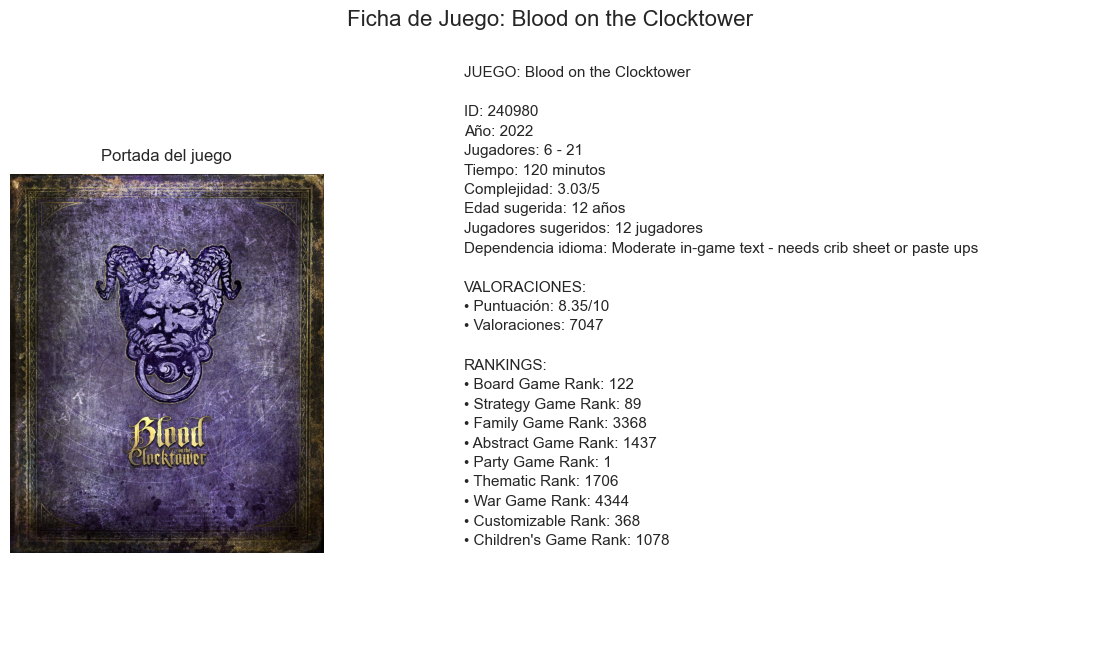

In [ ]:
mostrar_juego(df, df.loc[df['Party Game Rank'] == 1].index[0]) #Ejemplo de uso, se muestra el juego con mejor ranking en Party Game

# Parte 2

#Pregunta 6 - Escalamiento (1.5 puntos)

Para el subconjunto de variables numéricas elegido (['yearpublished', 'usersrated', 'owned', 'average', 'averageweight']), debes:

* Mostrar la media y la desviación estándar antes de escalar.

* Aplicar MinMaxScaler y volver a mostrar esos mismos estadísticos.

* Aplicar StandardScaler y volver a mostrarlos por última vez.

**0.5 punto por completar el código y 1 punto por responder la pregunta.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 1) Detectar todas las columnas numéricas
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# 2) subconjunto para analizar en la pregunta
subset = ['yearpublished', 'usersrated', 'owned', 'average', 'averageweight'] #

X = df[subset]
desc = X.describe()
print("Antes de escalar (subset):\n", desc.loc[['mean','std']])

# 4) MinMaxScaler sobre todas las numéricas
X_min = MinMaxScaler().fit_transform(X) #Completar
df_min = pd.DataFrame(X_min, columns=subset) #Completar
desc_min = df_min.describe()
print("\nDespués de MinMaxScaler (subset):\n", desc_min.loc[['mean','std']])

# 5) StandardScaler sobre todas las numéricas
X_std = StandardScaler().fit_transform(X) # Completar
df_std = pd.DataFrame(X_std, columns=subset) # Completar
desc_std = df_std.describe()
print("\nDespués de StandardScaler (subset):\n", desc_std.loc[['mean','std']])


Antes de escalar (subset):
       yearpublished  usersrated   owned  average  averageweight
mean        2009.80     1182.16 2112.54     6.53           2.03
std           13.61     4704.80 7221.70     0.88           0.80

Después de MinMaxScaler (subset):
       yearpublished  usersrated  owned  average  averageweight
mean           0.88        0.01   0.01     0.64           0.27
std            0.11        0.04   0.03     0.11           0.21

Después de StandardScaler (subset):
       yearpublished  usersrated  owned  average  averageweight
mean          -0.00        0.00   0.00     0.00           0.00
std            1.00        1.00   1.00     1.00           1.00


**¿Para qué sirve el escalado de variables en el preprocesamiento de datos?**

RESPUESTA: El escalado homogénea las magnitudes de todas las características, de modo que ninguna domine los cálculos basados en distancia (p.ej. KNN, clustering) ni en varianza (p.ej. PCA), y además mejora la convergencia y estabilidad de muchos algoritmos de optimización

# Pregunta 7 -(1.5 puntos)

En el algoritmo Particle Swarm Optimization (PSO), ¿qué representan la fuerza inercial, el aprendizaje cognitivo y el aprendizaje social? Explica cómo cada uno influye en el movimiento de las partículas y qué sucede si se incrementa o disminuye el valor del coeficiente de inercia (ω).

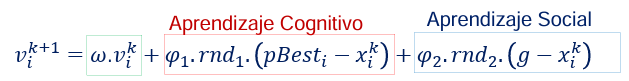

RESPUESTA:

* Fuerza inercial : Controla cuánto del movimiento anterior conserva la partícula. Una inercia alta favorece la exploración (movimientos más amplios, búsqueda más global), mientras que una inercia baja favorece la explotación (movimientos más pequeños, búsqueda local).

* Aprendizaje cognitivo : Representa la tendencia de la partícula a volver a su mejor posición conocida. Permite aprendizaje individual.

* Aprendizaje social: Refleja la influencia del enjambre, guiando a la partícula hacia la mejor solución global. Permite aprendizaje colectivo.

#Pregunta 8 (1.5 puntos)

Explica brevemente el rol de las abejas empleadas, observadoras y exploradoras en el algoritmo ABC. ¿Por qué es importante el mecanismo de abandono de soluciones?

RESPUESTA:

* Abejas empleadas:
Exploran soluciones actuales (fuentes de alimento) y comparten su calidad en la colmena.

* Abejas observadoras:
Seleccionan soluciones observando a las abejas empleadas y exploran nuevas cercanas a las más prometedoras.

* Abejas exploradoras:
Reemplazan soluciones estancadas por nuevas completamente aleatorias (búsqueda global).

* Mecanismo de abandono:
Permite descartar soluciones que no han mejorado tras varios intentos, evitando el estancamiento y favoreciendo la diversidad.

# Pregunta 9 - Codificación (1.5 puntos)




A continuación se describen dos variables categóricas:

* Nivel de satisfacción del cliente: Bajo, Medio, Alto.

* Color de producto: Rojo, Verde, Azul, Amarillo.

Para cada variable, indica qué técnica de codificación usarías — Label Encoding o One-Hot Encoding — y justifica brevemente tu elección.

RESPUESTA:

Nivel de satisfacción (Bajo < Medio < Alto): usaría Label Encoding, porque existe un orden natural y asignar valores 0, 1, 2 preserva esa jerarquía.

Color de producto (Rojo, Verde, Azul, Amarillo): usaría One-Hot Encoding, ya que no hay orden entre categorías y cada color debe representarse como variable independiente.

# Pregunta 10 (1.5 punto)

Separar datos en 3 conjuntos: train (60%), validation (20%) y test (20%) (1 punto)

In [ ]:
# Supongamos que queremos predecir la puntuación media 'average'
# 0) Definir X e y a partir de df
X = df.drop(columns=['average'])
y = df['average']

In [ ]:
from sklearn.model_selection import train_test_split
# Primera división: 60% train, 40% temp (que luego se dividirá en valid y test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Segunda división: 50% de temp para valid, 50% para test → 20% y 20% del total
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verificación de tamaños
print(f"Train size: {len(X_train)}, Validation size: {len(X_valid)}, Test size: {len(X_test)}")

Train size: 13033, Validation size: 4345, Test size: 4345
